In [14]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns


In [15]:
books = pd.read_csv(r"C:\Users\priya\AIML Training\books.csv")
ratings = pd.read_csv(r"C:\Users\priya\AIML Training\ratings.csv")

In [16]:
books['features']=books['Title']+""+books['Author']+""+books['Genre']
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(books['features'])
content_similarity =cosine_similarity(tfidf_matrix)

In [17]:
book_index = 0
similar_books = content_similarity[book_index].argsort()[::-1][1:4]
print("content-Based Recommendations for 'Harry Potter':")
print(books.iloc[similar_books]['Title'].tolist())


content-Based Recommendations for 'Harry Potter':
['Percy Jackson', 'Angels and Demons', 'The Da Vinci Code']


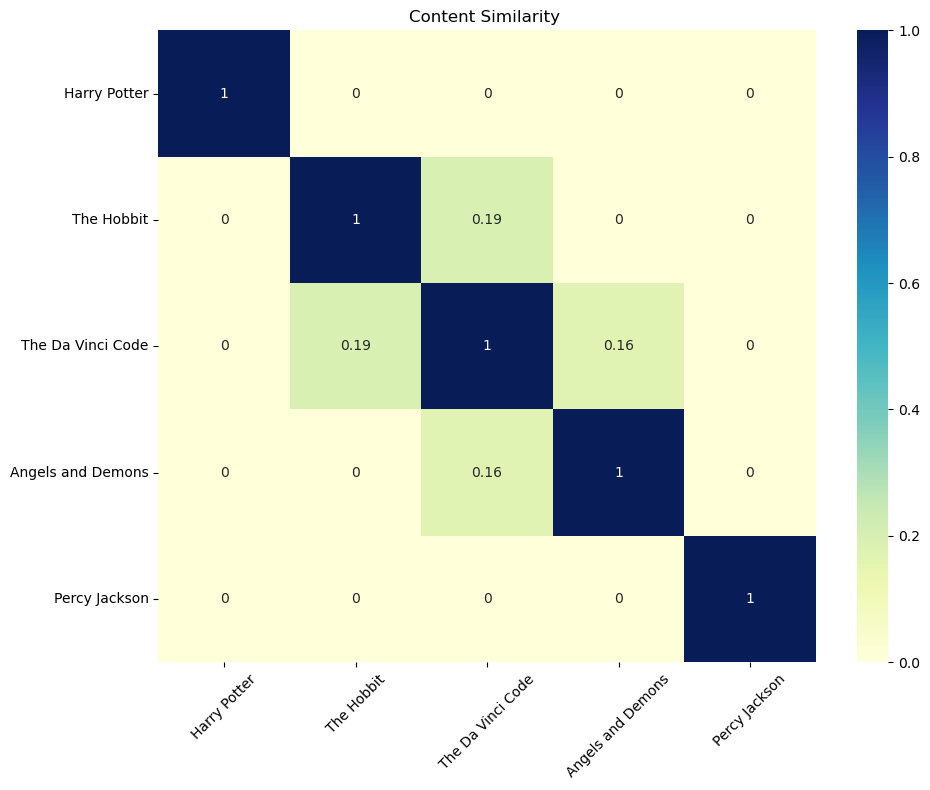

In [18]:
#visual
plt.figure(figsize=(10, 8))
sns.heatmap(content_similarity, xticklabels=books["Title"], yticklabels=books["Title"], annot=True, cmap="YlGnBu")
plt.title("Content Similarity ")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [19]:
user_item_matrix = ratings.pivot_table(index='User_ID',columns = 'Book_ID',values='Rating').fillna(0)
user_similarity=cosine_similarity(user_item_matrix)

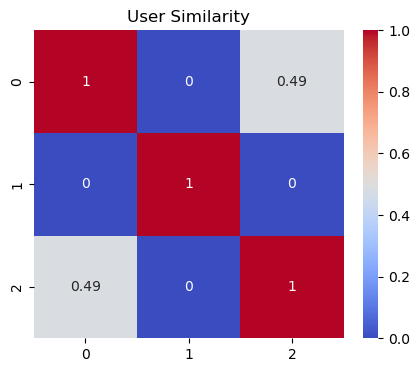

In [20]:
plt.figure(figsize=(5,4))
sns.heatmap(user_similarity,annot=True, cmap='coolwarm')
plt.title("User Similarity")
plt.show()

In [21]:
import numpy as np
user_sim_df = pd.DataFrame(user_similarity,
index=user_item_matrix.index, columns=user_item_matrix.index)
similar_users = user_sim_df[1].sort_values(ascending=False)[1:]
print("\nUsers most similar to User 1:")
print(similar_users)


Users most similar to User 1:
User_ID
3    0.487805
2    0.000000
Name: 1, dtype: float64


In [23]:
content_scores = content_similarity[book_index]
user_ratings = user_item_matrix.loc[1]
aligned_ratings=user_ratings.reindex(books["Book_ID"]).fillna(0).values
hybrid_score=0.6*content_scores+0.4*aligned_ratings

In [25]:
top_indices=np.argsort(hybrid_score)[::-1]
recommended_indices=[i for i in top_indices if i!=book_index][::3]

In [26]:
print("\nHybrid Recommendations for User 1:")
print(books.iloc[recommended_indices]['Title'].tolist())


Hybrid Recommendations for User 1:
['The Hobbit', 'Angels and Demons']
